In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 130s 1us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [5]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

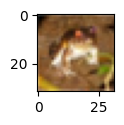

In [6]:
plot_sample(0)

In [7]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [8]:
classes[y_train[3][0]]

'deer'

In [9]:
X_train_norm=X_train.astype('float32')
X_train_norm=X_train/255.0
X_train_norm[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [11]:
X_test_norm=X_test.astype('float32')
X_test_norm=X_test/255.0
X_test_norm[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

In [10]:
y_train_categorical=keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(32,32,3)),keras.layers.Dense(3000,activation='relu'),keras.layers.Dense(1000,activation='relu'), keras.layers.Dense(10,activation='sigmoid')])

model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train_norm,y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 111s 69ms/step - loss: 1.8066 - accuracy: 0.3571
Epoch 2/50
1563/1563 [==============================] - 105s 67ms/step - loss: 1.6190 - accuracy: 0.4281
Epoch 3/50
1563/1563 [==============================] - 132s 84ms/step - loss: 1.5401 - accuracy: 0.4570
Epoch 4/50
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4796 - accuracy: 0.4783
Epoch 5/50
1563/1563 [==============================] - 113s 72ms/step - loss: 1.4273 - accuracy: 0.4967
Epoch 6/50
1563/1563 [==============================] - 149s 95ms/step - loss: 1.3875 - accuracy: 0.5131
Epoch 7/50
1563/1563 [==============================] - 135s 86ms/step - loss: 1.3463 - accuracy: 0.5254
Epoch 8/50
1563/1563 [==============================] - 106s 68ms/step - loss: 1.3145 - accuracy: 0.5392
Epoch 9/50
1563/1563 [==============================] - 104s 66ms/step - loss: 1.2809 - accuracy: 0.5500
Epoch 10/50
1563/1563 [==============================] 

In [14]:
y_predict=model.predict(X_test_norm)

313/313 [==============================] - 6s 19ms/step


In [15]:
np.argmax(y_predict[0])

3

In [17]:
classes[np.argmax(y_predict[0])]

'cat'

In [24]:
classes[y_test[4][0]]

'frog'

In [29]:
y_predicted_labels=[np.argmax(i) for i in y_predict]
y_test_labels=[i[0] for i in y_test]

y_test_labels[:10]


[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

In [31]:
y_predicted_labels[:10]

[3, 8, 0, 0, 4, 6, 1, 6, 4, 1]

Text(95.72222222222221, 0.5, 'Truth')

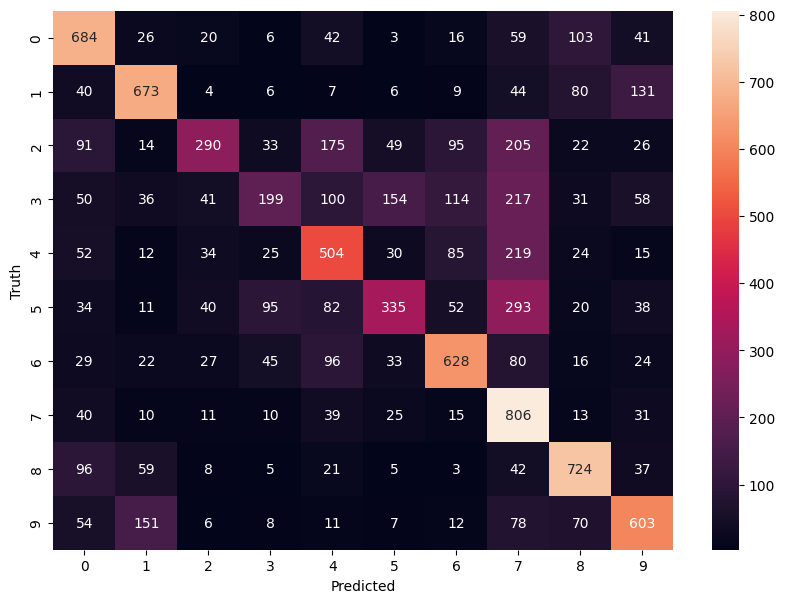

In [30]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test_labels,predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

